In [1]:
import pandas as pd

In [2]:
df24 = pd.read_csv("data/2024_comptage-velo-donnees-compteurs.csv", on_bad_lines='skip')
df24.head()

,,,,,,,"Identifiant du compteur;""Nom du compteur"";""Identifiant du site de comptage"";""Nom du site de comptage"";""Comptage horaire"";""Date et heure de comptage"";""Date d'installation du site de comptage"";""Lien vers photo du site de comptage"";""Coordonnées géographiques"""
"100044493-101044493;""67 boulevard Voltaire SE-NO"";""100044493"";""67 boulevard Voltaire"";155.0;2024-01-02 19:00:00.000 +0100;2018-06-27 00:00:00.000;{'https://filer.eco-counter-tools.com/file/66/735aaf617596de01fcb9fa7abcbdd64ce1673184d31338359bce5ba4d25bc366/15718231423950.jpg'",'https://filer.eco-counter-tools.com/file/68/d5e7b51b0132bb5f130ad0366783dc2bb3df77f360556a769d0815cf109a4968/Y2H18034809_20200819121429.jpg','https://filer.eco-counter-tools.com/file/76/f5ac337e501a805dd5a6b639c96e1bb6f1291c62fcd24bfc806165d1e292c176/Y2H18034809_20210811114932.jpg','https://filer.eco-counter-tools.com/file/7d/ade19198856cd42d7e8ade9fdaa1f83dc9a9df77d26e62637f405c86012c3e7d/15978320854910.jpg','https://filer.eco-counter-tools.com/file/aa/3b42586ff284b1ed47b93003b456e95b962888d0cfec98d7e85988952a4c39aa/Y2H18034809_20240618131123.jpg','https://filer.eco-counter-tools.com/file/c2/fab6a7934a6f5d472a1b4e7f6c68552eca77bc5ac6773eb9472e307729be76c2/15302602919700.jpg',"'https://filer.eco-counter-tools.com/file/fa/57f590dd2aded726e99b9c6f52c0573180f1d4b8eb84f7c5bea9a11fabf280fa/Y2H18034809_20220802151938.jpg'};""48.86149","2.37376"""
"100044493-101044493;""67 boulevard Voltaire SE-NO"";""100044493"";""67 boulevard Voltaire"";169.0;2024-01-05 14:00:00.000 +0100;2018-06-27 00:00:00.000;{'https://filer.eco-counter-tools.com/file/66/735aaf617596de01fcb9fa7abcbdd64ce1673184d31338359bce5ba4d25bc366/15718231423950.jpg'",'https://filer.eco-counter-tools.com/file/68/d5e7b51b0132bb5f130ad0366783dc2bb3df77f360556a769d0815cf109a4968/Y2H18034809_20200819121429.jpg','https://filer.eco-counter-tools.com/file/76/f5ac337e501a805dd5a6b639c96e1bb6f1291c62fcd24bfc806165d1e292c176/Y2H18034809_20210811114932.jpg','https://filer.eco-counter-tools.com/file/7d/ade19198856cd42d7e8ade9fdaa1f83dc9a9df77d26e62637f405c86012c3e7d/15978320854910.jpg','https://filer.eco-counter-tools.com/file/aa/3b42586ff284b1ed47b93003b456e95b962888d0cfec98d7e85988952a4c39aa/Y2H18034809_20240618131123.jpg','https://filer.eco-counter-tools.com/file/c2/fab6a7934a6f5d472a1b4e7f6c68552eca77bc5ac6773eb9472e307729be76c2/15302602919700.jpg',"'https://filer.eco-counter-tools.com/file/fa/57f590dd2aded726e99b9c6f52c0573180f1d4b8eb84f7c5bea9a11fabf280fa/Y2H18034809_20220802151938.jpg'};""48.86149","2.37376"""
"100044493-101044493;""67 boulevard Voltaire SE-NO"";""100044493"";""67 boulevard Voltaire"";30.0;2024-01-09 06:00:00.000 +0100;2018-06-27 00:00:00.000;{'https://filer.eco-counter-tools.com/file/66/735aaf617596de01fcb9fa7abcbdd64ce1673184d31338359bce5ba4d25bc366/15718231423950.jpg'",'https://filer.eco-counter-tools.com/file/68/d5e7b51b0132bb5f130ad0366783dc2bb3df77f360556a769d0815cf109a4968/Y2H18034809_20200819121429.jpg','https://filer.eco-counter-tools.com/file/76/f5ac337e501a805dd5a6b639c96e1bb6f1291c62fcd24bfc806165d1e292c176/Y2H18034809_20210811114932.jpg','https://filer.eco-counter-tools.com/file/7d/ade19198856cd42d7e8ade9fdaa1f83dc9a9df77d26e62637f405c86012c3e7d/15978320854910.jpg','https://filer.eco-counter-tools.com/file/aa/3b42586ff284b1ed47b93003b456e95b962888d0cfec98d7e85988952a4c39aa/Y2H18034809_20240618131123.jpg','https://filer.eco-counter-tools.com/file/c2/fab6a7934a6f5d472a1b4e7f6c68552eca77bc5ac6773eb9472e307729be76c2/15302602919700.jpg',"'https://filer.eco-counter-tools.com/file/fa/57f590dd2aded726e99b9c6f52c0573180f1d4b8eb84f7c5bea9a11fabf280fa/Y2H18034809_20220802151938.jpg'};""48.86149","2.37376"""
"100044493-101044493;""67 boulevard Voltaire SE-NO"";""100044493"";""67 boulevard Voltaire"";294.0;2024-01-10 18:00:00.000 +0100;2018-06-27 00:00:00.000;{'https://filer.eco-counter-tools.com/file/66/735aaf617596de01fcb9fa7abcbdd64ce1673184d31338359bce5ba4d25bc366/15718231423950.jpg'",'https://filer.ec

In [4]:
colsToKeep = [
    # 'Identifiant du compteur',
    # 'Nom du compteur',
    # 'Identifiant du site de comptage',
    'Nom du site de comptage',
    'Comptage horaire',
    'Date et heure de comptage',
    #"Date d'installation du site de comptage",
    #'Lien vers photo du site de comptage',
    'Coordonnées géographiques',
    # 'Identifiant technique compteur',
    # 'ID Photos',
    # 'test_lien_vers_photos_du_site_de_comptage_',
    # 'id_photo_1',
    # 'url_sites',
    # 'type_dimage',
    # 'mois_annee_comptage'
]
df24 = pd.read_csv('data/2024_comptage-velo-donnees-compteurs.csv', sep=";", usecols=colsToKeep, on_bad_lines='skip')
df24.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,67 boulevard Voltaire,155.0,2024-01-02 19:00:00.000 +0100,"48.86149, 2.37376"
1,67 boulevard Voltaire,169.0,2024-01-05 14:00:00.000 +0100,"48.86149, 2.37376"
2,67 boulevard Voltaire,30.0,2024-01-09 06:00:00.000 +0100,"48.86149, 2.37376"
3,67 boulevard Voltaire,294.0,2024-01-10 18:00:00.000 +0100,"48.86149, 2.37376"
4,67 boulevard Voltaire,9.0,2024-01-12 04:00:00.000 +0100,"48.86149, 2.37376"


In [5]:
df24.shape

(1505640, 4)

In [6]:
# Séparer latitude et longitude
df24[['latitude', 'longitude']] = df24['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df24["Date et heure de comptage"] = pd.to_datetime(
    df24["Date et heure de comptage"], 
    utc=True,    # rend les dates tz‑aware (UTC)
    errors='coerce'
)

In [7]:
df24_sortedbyplace = df24.sort_values(by=["Nom du site de comptage","Date et heure de comptage"])
df24_sortedbyplace.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
194834,10 boulevard Auguste Blanqui,6.0,2023-12-31 23:00:00+00:00,"48.83082, 2.35317",48.83082,2.35317
257209,10 boulevard Auguste Blanqui,6.0,2024-01-01 00:00:00+00:00,"48.83082, 2.35317",48.83082,2.35317
157634,10 boulevard Auguste Blanqui,19.0,2024-01-01 01:00:00+00:00,"48.83082, 2.35317",48.83082,2.35317
911327,10 boulevard Auguste Blanqui,24.0,2024-01-01 02:00:00+00:00,"48.83082, 2.35317",48.83082,2.35317
285727,10 boulevard Auguste Blanqui,13.0,2024-01-01 03:00:00+00:00,"48.83082, 2.35317",48.83082,2.35317


In [8]:
cols = ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude"]
df24_sites = df24[cols].drop_duplicates(subset=["Nom du site de comptage"])
print(df24_sites.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df24_sites

(89, 4)


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude
0,67 boulevard Voltaire,"48.86149, 2.37376",48.86149,2.37376
37,56 boulevard Kellermann,"48.8209883, 2.3502907",48.8209883,2.3502907
69,62 boulevard Ney,"48.8987065, 2.3574172",48.8987065,2.3574172
96,Quai des Tuileries,"48.8635, 2.32239",48.8635,2.32239
120,Face au 70 quai de Bercy,"48.8295233, 2.38699",48.8295233,2.38699
149,Face au 8 avenue de la porte de Charenton,"48.83033052177593, 2.400550837519253",48.83033052177593,2.400550837519253
152,86 rue de la Chapelle,"48.896507, 2.3590877",48.896507,2.3590877
189,38 rue Turbigo,"48.86502, 2.35387",48.86502,2.35387
225,24 boulevard Jourdan,"48.82029, 2.33936",48.82029,2.33936
250,18 quai de l'Hôtel de Ville,"48.85372, 2.35702",48.85372,2.35702


In [9]:
import geopandas as gpd

# 1. Copie du DataFrame de base
df = df24_sites.copy()

# 2. Nettoyage des coordonnées
df['latitude']  = pd.to_numeric(df['latitude'],  errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])

# 3. Création d’un GeoDataFrame à partir du DataFrame nettoyé
gdf_sites = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 4. Chargement et projection des arrondissements
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
gdf_arr = gpd.read_file(url_geojson)
gdf_arr = gdf_arr.to_crs(epsg=4326)

# 5. Spatial join — points dans les polygones
gdf_joined = gpd.sjoin(gdf_sites, gdf_arr, how="left", predicate="within")

# 6. Sélection & renommage des colonnes d’intérêt
df24_final = gdf_joined[
    ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude", "l_ar"]
].rename(columns={"l_ar": "arrondissement"})

df24_final


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,67 boulevard Voltaire,"48.86149, 2.37376",48.861490,2.373760,11ème Ardt
37,56 boulevard Kellermann,"48.8209883, 2.3502907",48.820988,2.350291,13ème Ardt
69,62 boulevard Ney,"48.8987065, 2.3574172",48.898707,2.357417,18ème Ardt
96,Quai des Tuileries,"48.8635, 2.32239",48.863500,2.322390,1er Ardt
120,Face au 70 quai de Bercy,"48.8295233, 2.38699",48.829523,2.386990,12ème Ardt
149,Face au 8 avenue de la porte de Charenton,"48.83033052177593, 2.400550837519253",48.830331,2.400551,12ème Ardt
152,86 rue de la Chapelle,"48.896507, 2.3590877",48.896507,2.359088,18ème Ardt
189,38 rue Turbigo,"48.86502, 2.35387",48.865020,2.353870,3ème Ardt
225,24 boulevard Jourdan,"48.82029, 2.33936",48.820290,2.339360,14ème Ardt
250,18 quai de l'Hôtel de Ville,"48.85372, 2.35702",48.853720,2.357020,4ème Ardt


In [10]:
import pandas as pd

def list_to_semicolon_str(lst):
    return "; ".join(str(v) for v in lst if pd.notna(v))

# Regroupement par arrondissement et concaténation des coordonnées
tableau_arr = (
    df24_final
    .groupby("arrondissement", dropna=False)
    .agg({
        "Coordonnées géographiques": lambda x: list_to_semicolon_str(x),
        "latitude": lambda x: list_to_semicolon_str(x),
        "longitude": lambda x: list_to_semicolon_str(x)
    })
    .reset_index()
)

# Trier les arrondissements par numéro — si le nom contient un nombre
# On extrait le premier nombre trouvé dans la chaîne (ex “12e”, “8”, etc.)
tableau_arr['arr_num'] = (
    tableau_arr['arrondissement']
    .str.extract(r'(\d+)', expand=False)  # capture les chiffres
    .astype(float, errors='ignore')       # convertit en float si possible
)

# Trier par ce numéro, en mettant les NaN (arrondissements sans numéro numérique) à la fin
tableau_arr = tableau_arr.sort_values(
    by='arr_num', na_position='last'
).drop(columns='arr_num').reset_index(drop=True)

# Optionnel : afficher tout, mais attention si le tableau est très long
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tableau_arr


,arrondissement,Coordonnées géographiques,latitude,longitude
0,1er Ardt,"48.8635, 2.32239",48.8635,2.32239
1,2ème Ardt,"48.86377, 2.35096",48.86377,2.35096
2,3ème Ardt,"48.86502, 2.35387",48.86502,2.35387
3,4ème Ardt,"48.85372, 2.35702; 48.85735, 2.35211",48.85372; 48.85735,2.35702; 2.35211
4,5ème Ardt,"48.85013, 2.35423",48.85013,2.35423
5,7ème Ardt,"48.86234922372282, 2.3038026317954063; 48.86179, 2.32014; 48.8629, 2.3118; 48.86281, 2.31037; 48.86279, 2.31055; 48.847507, 2.316226; 48.862648, 2.3020158",48.86234922372282; 48.86179; 48.8629; 48.86281; 48.86279; 48.847507; 48.862648,2.3038026317954063; 2.32014; 2.3118; 2.31037; 2.31055; 2.316226; 2.3020158
6,8ème Ardt,"48.86999, 2.30722; 48.86999, 2.30743; 48.86462, 2.31444; 48.86382, 2.32006; 48.88274608076101, 2.3238551616668706",48.86999; 48.86999; 48.86462; 48.86382; 48.88274608076101,2.30722; 2.30743; 2.31444; 2.32006; 2.3238551616668706
7,10ème Ardt,"48.87756, 2.35535; 48.87769, 2.35475",48.87756; 48.87769,2.35535; 2.35475
8,11ème Ardt,"48.86149, 2.37376; 48.86081, 2.37301; 48.86155, 2.37407; 48.860528, 2.388364; 48.86089, 2.37212; 48.85976, 2.38884",48.86149; 48.86081; 48.86155; 48.860528; 48.86089; 48.85976,2.37376; 2.37301; 2.37407; 2.388364; 2.37212; 2.38884
9,12ème Ardt,"48.8295233, 2.38699; 48.83033052177593, 2.400550837519253; 48.83848, 2.37587; 48.843435, 2.383378; 48.8346242, 2.4052827; 48.8436922, 2.3737767; 48.8402, 2.40889; 48.846099, 2.375456; 48.84613, 2.37559",48.8295233; 48.83033052177593; 48.83848; 48.843435; 48.8346242; 48.8436922; 48.8402; 48.846099; 48.84613,2.38699; 2.400550837519253; 2.37587; 2.383378; 2.4052827; 2.3737767; 2.40889; 2.375456; 2.37559


In [11]:
df24.shape

(1505640, 6)

In [12]:
df24["Date et heure de comptage"] = pd.to_datetime(df24["Date et heure de comptage"], utc=True)
df24["Date et heure de comptage"] = df24["Date et heure de comptage"].dt.tz_convert("Europe/Paris")
date_min = df24["Date et heure de comptage"].min()
date_max = df24["Date et heure de comptage"].max()

print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)

Date la plus ancienne : 2024-01-01 00:00:00+01:00
Date la plus récente : 2024-12-31 23:00:00+01:00


In [12]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2024
mois = [f"2024-{m:02d}" for m in range(1, 13)]


results_temp = []

# Groupement par arrondissement (issu de df22_final)
for arr, df_arr in df24_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_temp = []

        # Boucle sur les sites de l’arrondissement
        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=apparent_temperature"
                    "&timezone=Europe/Paris"
                )

                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Sécurité si données manquantes
                if "hourly" in data and "apparent_temperature" in data["hourly"]:
                    toutes_temp.extend(data["hourly"]["apparent_temperature"])

            except Exception as e:
                print(f"❌ Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = (
            sum(toutes_temp) / len(toutes_temp)
            if toutes_temp else None
        )

    results_temp.append(lignes_arr)

# DataFrame final
df24_temp_mensuel = pd.DataFrame(results_temp)

# Tri par numéro d’arrondissement
df24_temp_mensuel["arr_num"] = (
    df24_temp_mensuel["arrondissement"]
    .str.extract(r"(\d+)")
    .astype(float)
)

df24_temp_mensuel = (
    df24_temp_mensuel
    .sort_values("arr_num", na_position="last")
    .drop(columns="arr_num")
    .reset_index(drop=True)
)

# Sauvegarde locale
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2024_temperature_mensuelle_moyenne_par_arrondissement.csv"
)

df24_temp_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")


# Affichage
with pd.option_context(
    'display.max_columns', None,
    'display.max_colwidth', None,
    'display.width', None
):
    print(df24_temp_mensuel)


KeyboardInterrupt: 

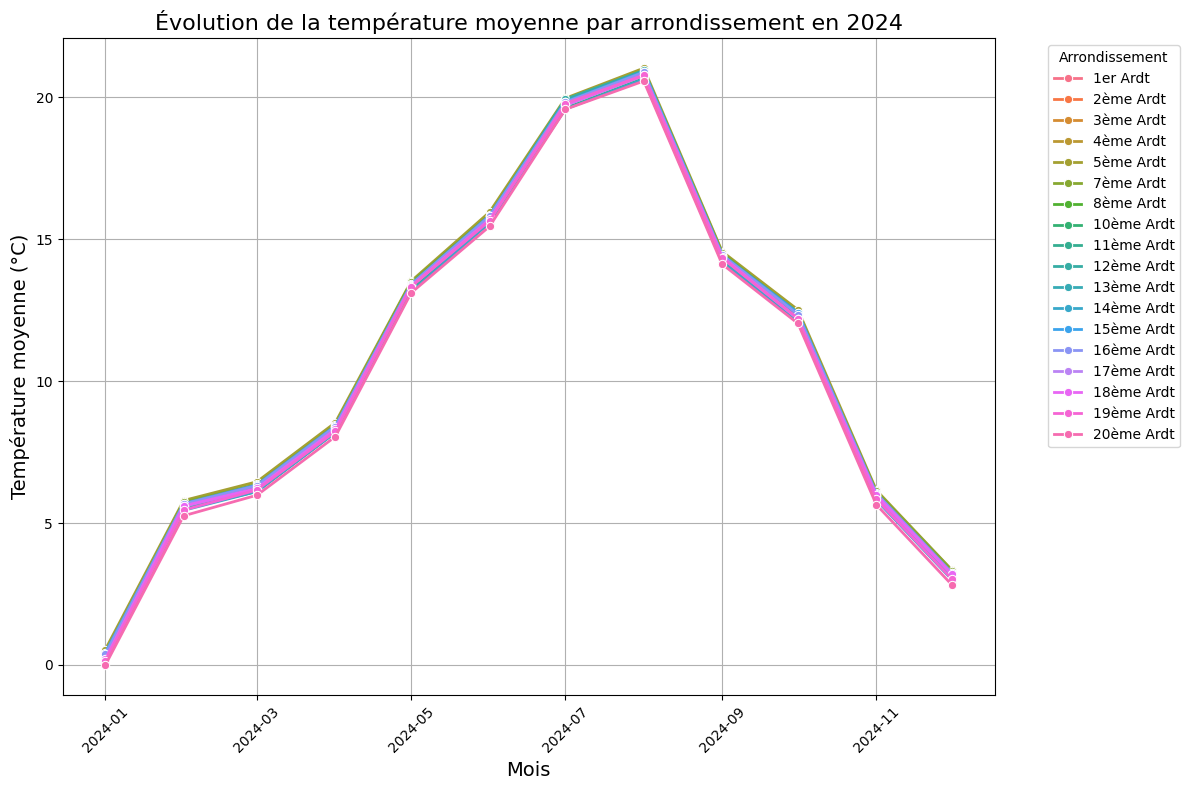

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2024_temperature_mensuelle_moyenne_par_arrondissement.csv"
df24_temp_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df24_long = df24_temp_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="temperature_moyenne_°C"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df24_long["mois"] = pd.to_datetime(df24_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df24_long,
    x="mois",
    y="temperature_moyenne_°C",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la température moyenne par arrondissement en 2024', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Température moyenne (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2024
mois = [f"2024-{m:02d}" for m in range(1, 13)]

results_precip = []

for arr, df_arr in df24_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_precip = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=precipitation"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Vérifie que la clé existe et étend la liste
                if "hourly" in data and "precipitation" in data["hourly"]:
                    toutes_precip.extend(data["hourly"]["precipitation"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        # Somme des précipitations du mois (total pour l'arrondissement)
        lignes_arr[periode] = sum(toutes_precip) if toutes_precip else None

    results_precip.append(lignes_arr)

df24_precip_mensuel = pd.DataFrame(results_precip)
df24_precip_mensuel["arr_num"] = df24_precip_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df24_precip_mensuel = df24_precip_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2024_precipitations_mensuelles_moyennes_par_arrondissement.csv"
)

df24_precip_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df24_precip_mensuel)  # ou df24_precip_mensuel selon nom variable

✅ Data sauvegardée dans data/2024_precipitations_mensuelles_moyennes_par_arrondissement.csv
   arrondissement  2024-01  2024-02  2024-03  2024-04  2024-05  2024-06  \
10       1er Ardt     65.0    106.5    104.8     88.1    126.6    104.0   
12      2ème Ardt     65.0    106.5    104.8     88.1    126.6    104.0   
13      3ème Ardt     65.0    106.5    104.8     88.1    126.6    104.0   
14      4ème Ardt    133.2    194.4    207.6    178.2    268.2    224.6   
15      5ème Ardt     66.6     97.2    103.8     89.1    134.1    112.3   
16      7ème Ardt    456.6    736.2    732.6    617.7    893.7    736.3   
17      8ème Ardt    325.0    532.5    524.0    440.5    633.0    520.0   
0      10ème Ardt    130.0    213.0    209.6    176.2    253.2    208.0   
1      11ème Ardt    404.4    652.2    693.0    513.0    755.4    586.2   
2      12ème Ardt    580.5    984.6    930.6    729.0   1264.5    906.3   
3      13ème Ardt    784.5   1251.8   1242.8   1012.5   1654.0   1266.4   
4      1

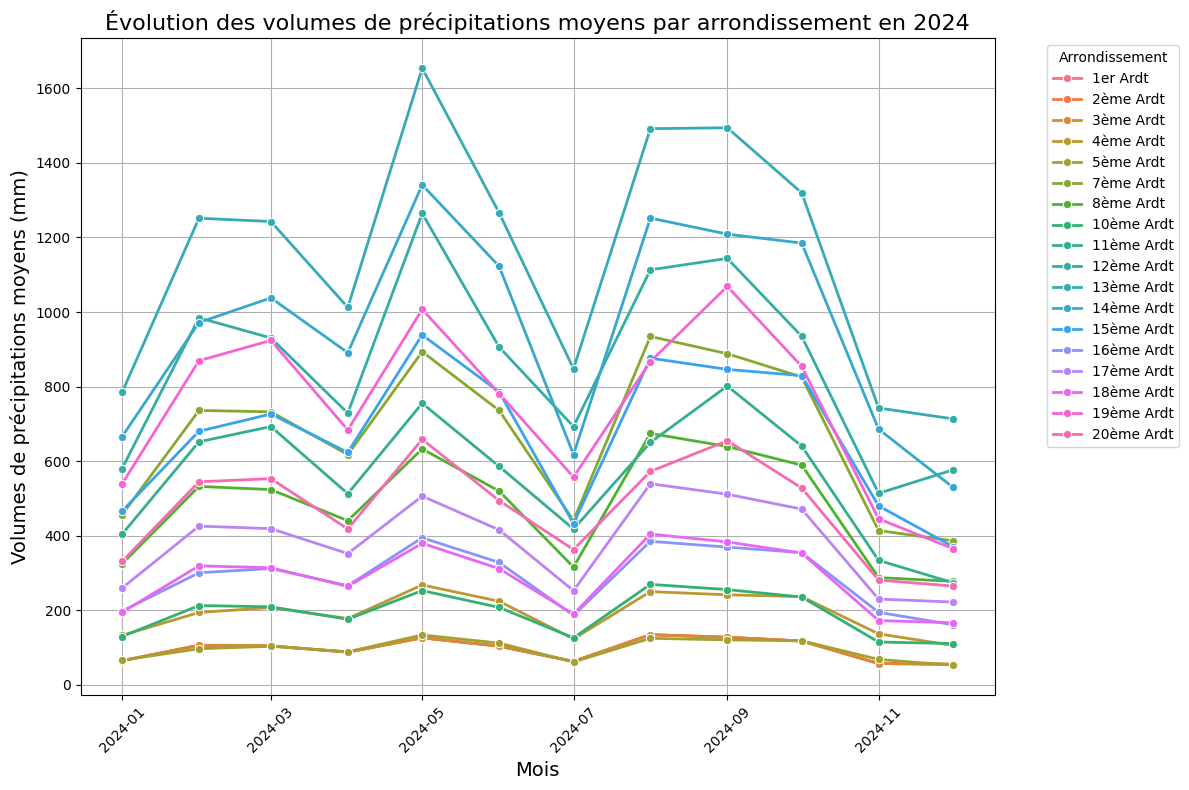

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2024_precipitations_mensuelles_moyennes_par_arrondissement.csv"
df24_precip_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df24_long = df24_precip_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="volumes_precipitations_moyens_mm"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df24_long["mois"] = pd.to_datetime(df24_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df24_long,
    x="mois",
    y="volumes_precipitations_moyens_mm",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution des volumes de précipitations moyens par arrondissement en 2024', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Volumes de précipitations moyens (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2024
mois = [f"2024-{m:02d}" for m in range(1, 13)]

results_cloud = []

for arr, df_arr in df24_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_cloud = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=cloud_cover"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                if "hourly" in data and "cloud_cover" in data["hourly"]:
                    toutes_cloud.extend(data["hourly"]["cloud_cover"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = sum(toutes_cloud)/len(toutes_cloud) if toutes_cloud else None

    results_cloud.append(lignes_arr)

df24_cloud_mensuel = pd.DataFrame(results_cloud)
df24_cloud_mensuel["arr_num"] = df24_cloud_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df24_cloud_mensuel = df24_cloud_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2024_cloudcover_mensuel_moyen_par_arrondissement.csv"
)

df24_cloud_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df24_cloud_mensuel)


✅ Data sauvegardée dans data/2024_cloudcover_mensuel_moyen_par_arrondissement.csv
   arrondissement    2024-01    2024-02    2024-03    2024-04    2024-05  \
10       1er Ardt  75.385753  89.339080  80.032258  70.881944  72.827957   
12      2ème Ardt  75.385753  89.339080  80.032258  70.881944  72.827957   
13      3ème Ardt  75.385753  89.339080  80.032258  70.881944  72.827957   
14      4ème Ardt  75.165323  88.923851  80.052419  70.945833  72.864247   
15      5ème Ardt  75.165323  88.923851  80.052419  70.945833  72.864247   
16      7ème Ardt  75.354263  89.279762  80.035138  70.891071  72.833141   
17      8ème Ardt  75.385753  89.339080  80.032258  70.881944  72.827957   
0      10ème Ardt  75.385753  89.339080  80.032258  70.881944  72.827957   
1      11ème Ardt  75.888441  89.498563  80.572581  71.818056  73.225806   
2      12ème Ardt  75.580645  88.706897  80.436828  71.395833  73.114247   
3      13ème Ardt  75.407594  88.797294  80.276658  71.208333  73.010081   
4     

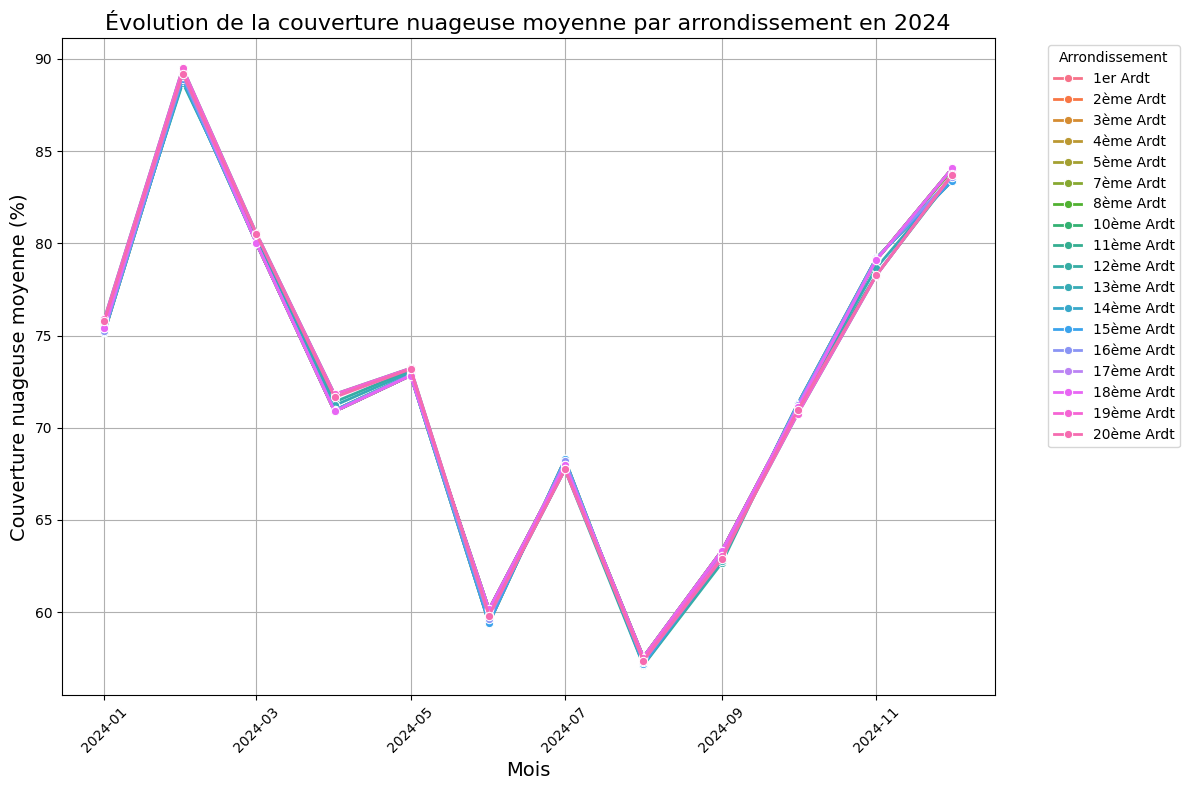

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2024_cloudcover_mensuel_moyen_par_arrondissement.csv"
df24_cloud_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df24_long = df24_cloud_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="couverture_nuageuse_moyenne_%"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df24_long["mois"] = pd.to_datetime(df24_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df24_long,
    x="mois",
    y="couverture_nuageuse_moyenne_%",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la couverture nuageuse moyenne par arrondissement en 2024', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Couverture nuageuse moyenne (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
